In [118]:
#url = 'https://www.shopclues.com/search?q=football'

In [1]:
import datetime
import pandas as pd

In [2]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [4]:
product= input('\nsearch product here ===>>  ')


search product here ===>>   shirt


In [60]:
def getdatalist(soup):
    data = soup.find_all('div',{'class':'search_blocks'})
    print(len(data),'item found')
    result = []
    for item in data:
        title = item.find('h2').text
        ori_pri= item.find('span',attrs={'class':'p_price'}).text
        try:cost_price = item.find('div',attrs={'class':'old_prices'}).span.text
        except:cost_price=None
        dis = item.find('span',attrs={'class':'prd_discount'}).text
        result.append({
            'date':x,
            'title':title,
            'selling price':ori_pri[2:].replace('.','').replace(' ',''),
            'cost price':cost_price,
            'discount':dis.split()[0].replace('%','')
        })
    return result

In [119]:
biglist = []
for i in range(20):
    url = f"https://www.shopclues.com/ajaxCall/searchProducts?q={product}&z=1&page={i}&filters=&fl_cal=1&sc_z="
    x = datetime.datetime.now().strftime('%x')
    try:
        page = requests.get(url)
        if page.status_code==200:
            print('page loaded')
            soup = BeautifulSoup(page.text,'lxml')
            biglist.extend(getdatalist(soup))
        else:
            print('error',page.status_code)
    except Exception as e:
        print(e)
        print('error occured')
        
    

page loaded
12 item found
page loaded
12 item found
page loaded
12 item found
page loaded
12 item found
'NoneType' object has no attribute 'text'
error occured
page loaded
12 item found
'NoneType' object has no attribute 'text'
error occured
page loaded
12 item found
page loaded
12 item found
'NoneType' object has no attribute 'text'
error occured
page loaded
12 item found
page loaded
12 item found
'NoneType' object has no attribute 'text'
error occured
page loaded
12 item found


In [120]:

data = pd.DataFrame(biglist)
data = data[['date','title','selling price','cost price','discount']]
data.to_csv(f'{product}.csv')

In [140]:
data

,date,title,selling price,cost price,discount
0,08/18/19,Yellow Tree - Red PurpleT- shirt Half Sleeves...,399,499,60
1,08/18/19,PAUSE Black Solid Cotton Round Neck Slim Fit F...,599,649,45
2,08/18/19,Redbrick Oblique Zipper Hoodies Men tshirt /t ...,499,580,68
3,08/18/19,PAUSE Silver Solid Cotton Round Neck Slim Fit ...,649,699,41
4,08/18/19,Redbrick Oblique Zipper Hoodies Men tshirt /t ...,499,1199,58
5,08/18/19,PAUSE Red Solid Cotton Round Neck Slim Fit Sho...,599,649,45
6,08/18/19,PAUSE Maroon Solid Cotton Round Neck Slim Fit ...,649,699,41
7,08/18/19,Pause Yellow Solid Cotton Mandarin Slim Fit Fu...,799,849,43
8,08/18/19,PAUSE Grey Solid Cotton Round Neck Slim Fit Sh...,599,649,45
9,08/18/19,PAUSE Black Solid Cotton Round Neck Slim Fit F...,599,649,45


In [5]:
graph = pd.read_csv(f'{product}.csv',
                  parse_dates=['date'],
                  index_col=['title'],
                   dayfirst=True)

In [6]:
graph['actual discount'] = (graph['cost price']*graph['discount'])/100

In [7]:
cols = ['selling price','cost price','actual discount']
graph[cols].head()

,selling price,cost price,actual discount
title,,,
Yellow Tree - Red PurpleT- shirt Half Sleeves High Qu,399,499,299.40
PAUSE Black Solid Cotton Round Neck Slim Fit Full Sleev,599,649,292.05
Redbrick Oblique Zipper Hoodies Men tshirt /t shirt 100,499,580,394.40
PAUSE Silver Solid Cotton Round Neck Slim Fit Full Slee,649,699,286.59
Redbrick Oblique Zipper Hoodies Men tshirt /t shirt 100,499,1199,695.42


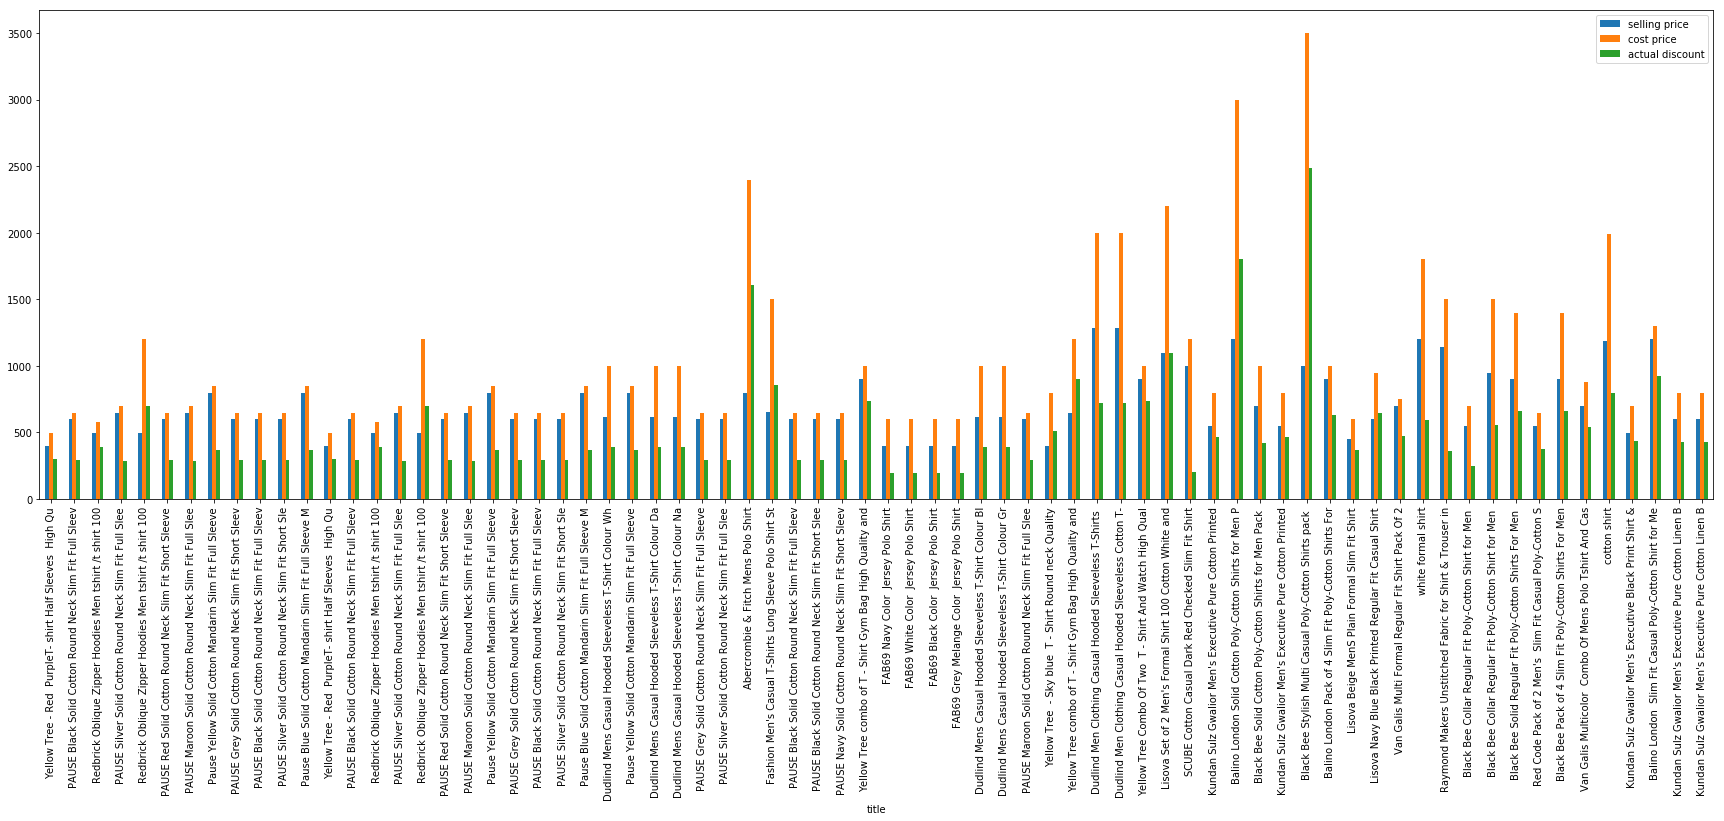

In [8]:
graph[cols].plot(kind='bar',figsize=(30,9))

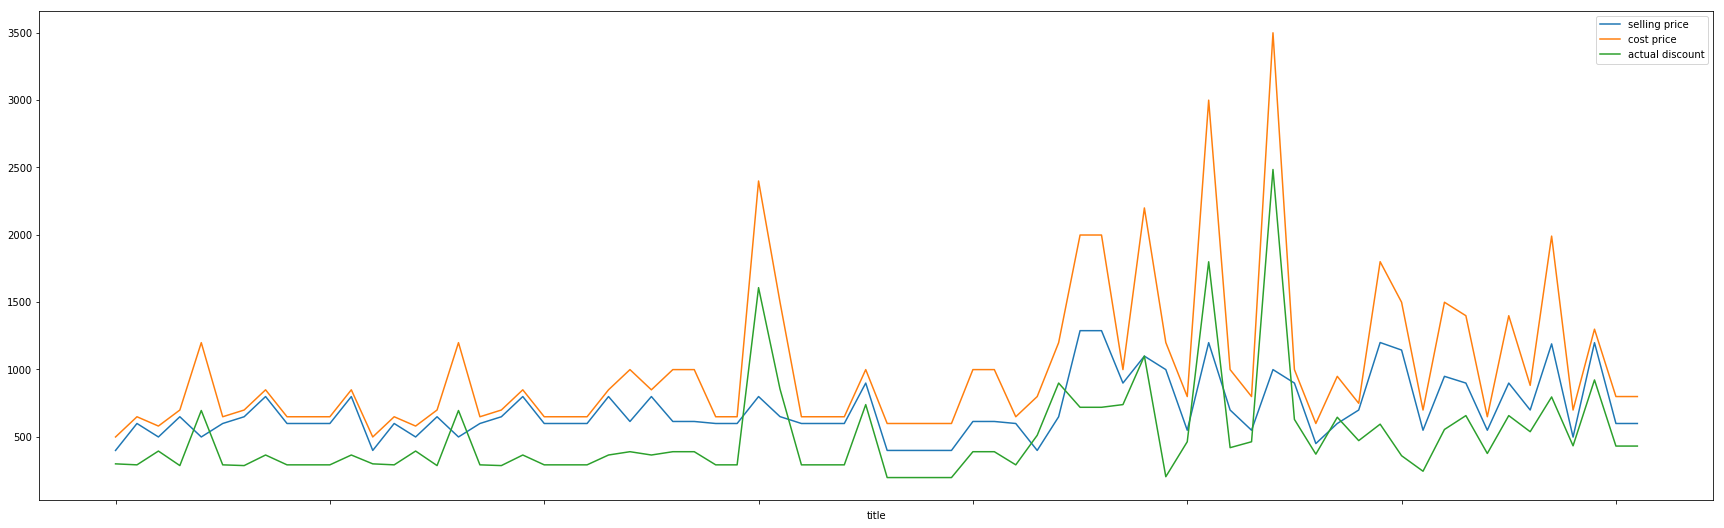

In [9]:
graph[cols].plot(kind='line',figsize=(30,9))

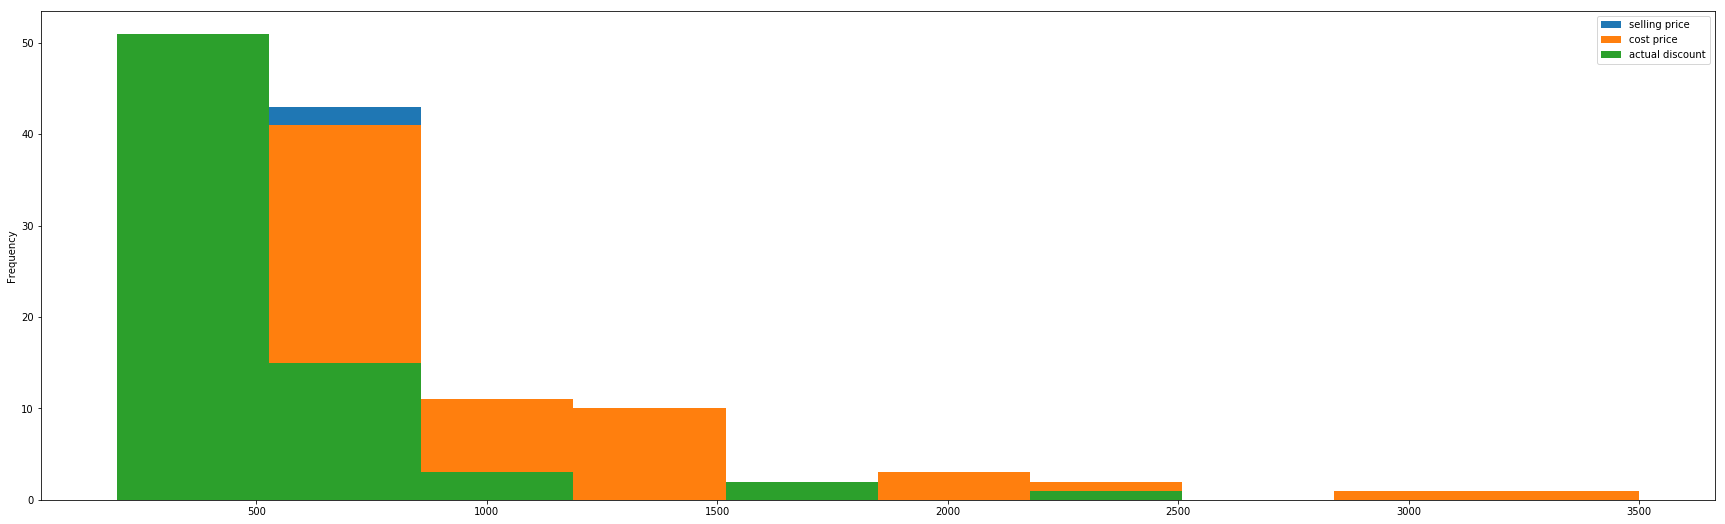

In [10]:
graph[cols].plot(kind='hist',figsize=(30,9))